In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import jax

import icomo


sys.path.append("../")
from tapm import model_STI
from tapm import sti_infection_results_LambdaP
from tapm import utils

## Model

In [2]:
args, y0 = utils.read_params(filename="model_params.txt")
integrator = model_STI.setup_model(args, y0)

INFO:tapm.STI.model_STI:Model setup complete and ready for simulation


## Sweep

## Hs, Ps are continuous from 0 to 0.2 and 0 to 1 respectively. Lambda_P with 8 discrete steps

In [3]:
# Define the ranges for H (HIV prevalence) and P (proportion of HIV positive individuals)
Hs = np.linspace(0, 0.2, 101)  # 101 points from 0 to 0.2
Ps = np.linspace(0, 1.0, 201)  # 201 points from 0 to 1.0

# Define different values for lambda_P (proportional infection rate due to HIV prevalence)
lambda_P_values = [
    6 / 360,
    5 / 360,
    4 / 360,
    3 / 360,
    2.5 / 360,
    2 / 360,
    1.5 / 360,
    1 / 360,
]

In [4]:
results = sti_infection_results_LambdaP.compute_sti_infections(
    Hs,
    Ps,
    lambda_P_values,
    y0,
    args,
    integrator,
    model_STI,
    filename="exp_m_gammaT_1by14_lambdaP",
)

INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Processing lambda_P: 0.016666666666666666
INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': 
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': UNIMPLEMENTED: LoadPjrtPlugin is not implemented on windows yet.
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Max check value for lambda_P 0.016666666666666666: 0.00020172030096926802
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Processing lambda_P: 0.013888888888888888
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Max check value for lambda_P 0.013888888888888888: 0.00020537958488442139
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Processing lambda_P: 0.011111111111111112
INFO:testing_artefacts_phar

In [5]:
# Arguments for the model
args = {
    "m_function": "exponential",  # Modulating function
    "beta_HIV": 0.6341 / 360.0,  # HIV infection rate per day
    "beta_STI": 0.0016 * 5.0,  # STI infection rate
    "mu": 1.0 / 45.0 / 360.0,  # Natural death rate per day
    "gamma_STI": 1.0 / 1.32 / 360.0,  # Recovery rate from asymptomatic STI per day
    "gammaT_STI": 0.1 / 14.0,  # Recovery rate from treated STI per day
    "lambda_0_a": 0.0,  # Baseline test rate for asymptomatic STI
    "lambda_0": 0.3 / 11.0,  # Baseline test rate for symptomatic STI
    "lambda_P": 1 / 3 / 360,  # Infection rate due to HIV prevalence
    "asymptomatic": 0.9,  # Proportion of asymptomatic infections
    "m_max": 0.8,  # Maximum modulating factor
    "H_thres": 0.1,  # HIV threshold
    "m_eps": 0.01,  # Small constant for smoothing
    "Phi_r": 40.0,  # Not used in the current model
    "H_tau": 20.0,  # Not used in the current model
    "c": 50.0,  # Scaling factor for HIV interaction term
    "H": 0.0,  # Initial HIV prevalence
    "P_HIV": 0.0,  # Initial proportion of HIV positive individuals
    "min_exp": 0.0,  # Minimum value for the exponential modulating factor
    "max_exp": 1.0,  # Maximum value for the exponential modulating factor
    "tau_exp": 0.2,  # Time constant for the exponential modulating factor
}

# Initial state of the compartments
y0 = {
    "S_STI": 0.99,  # Initial susceptible proportion
    "Ia_STI": 0.009,  # Initial asymptomatic proportion
    "Is_STI": 0.001,  # Initial symptomatic proportion
    "T_STI": 0.0,  # Initial treated proportion
}

integrator = model_STI.setup_model(args, y0)

# Define the ranges for H (HIV prevalence) and P (proportion of HIV positive individuals)
Hs = np.linspace(0, 0.2, 101)  # 101 points from 0 to 0.2
Ps = np.linspace(0, 1.0, 201)  # 201 points from 0 to 1.0

# Define different values for lambda_P (proportional infection rate due to HIV prevalence)
lambda_P_values = [
    6 / 360,
    5 / 360,
    4 / 360,
    3 / 360,
    2.5 / 360,
    2 / 360,
    1.5 / 360,
    1 / 360,
]

results = sti_infection_results_LambdaP.compute_sti_infections(
    Hs,
    Ps,
    lambda_P_values,
    y0,
    args,
    integrator,
    model_STI,
    filename="exp_m_gammaT_0.1by14",
)

INFO:testing_artefacts_pharmaco_multipath.STI.model_STI:Model setup complete and ready for simulation
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Processing lambda_P: 0.016666666666666666
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Max check value for lambda_P 0.016666666666666666: 0.0004704724374227331
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Processing lambda_P: 0.013888888888888888
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Max check value for lambda_P 0.013888888888888888: 0.0004738642144192388
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Processing lambda_P: 0.011111111111111112
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Max check value for lambda_P 0.011111111111111112: 0.00048053641470603323
INFO:testing_artefacts_pharmaco_multipath.STI.sti_infection_results_LambdaP:Processing lambda_P:

## Continuous values of Ps and Lambda_P

# Figures

## Endemic new infections (i.e., transitions from S to Ia + transitions from S to Is)

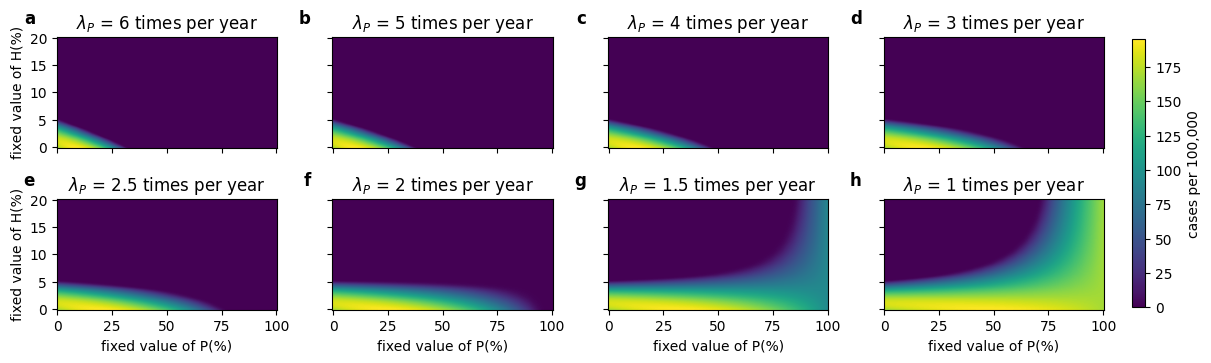

In [5]:
# Plotting


lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]


# Define a formatter function that multiplies the value by 100,000
def formatter(x, pos):
    return f"{x * 1e5:.0f}"


# Determine the global vmin and vmax
all_infections = np.concatenate(
    [results[lambda_P]["res_infections"].flatten() for lambda_P in lambda_P_values]
)


global_vmin = np.min(all_infections)


global_vmax = np.max(all_infections)


num_lambda_P = len(lambda_P_values)

gridspec = {
    "wspace": 0,
    "hspace": 0,
    "width_ratios": [1, 1, 1, 1],
    "height_ratios": [1, 1],
}
fig, axes = plt.subplots(
    2,
    num_lambda_P // 2,
    figsize=(3 * num_lambda_P // 2, 3.5),
    constrained_layout=True,
    gridspec_kw=gridspec,
)


nrows, ncols = axes.shape  # Assuming axes is a 2D array of subplots
for idx, lambda_P in enumerate(lambda_P_values):
    ax = axes.flat[idx]
    res_infections = results[lambda_P]["res_infections"]
    cax = ax.imshow(res_infections, origin="lower", vmin=global_vmin, vmax=global_vmax)
    ax.set_title(f"$\\lambda_P$ = {lambda_P_labels[idx]}")

    # Determine the position of the subplot
    row, col = divmod(idx, ncols)

    # Set xlabels only on the bottom most subplots
    if row == nrows - 1:
        ax.set_xlabel("fixed value of P(%)")
        ax.set_xticks([0, 50, 100, 150, 200])
        ax.set_xticklabels(
            [
                int(Ps[0] * 100),
                int(Ps[50] * 100),
                int(Ps[100] * 100),
                int(Ps[150] * 100),
                int(Ps[200] * 100),
            ]
        )
    else:
        ax.set_xticklabels([])  # Hide xtick labels for non-bottom subplots

    # Set ylabels only on the left most subplots
    if col == 0:
        ax.set_ylabel("fixed value of H(%)")
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels(
            [
                int(Hs[0] * 100),
                int(Hs[25] * 100),
                int(Hs[50] * 100),
                int(Hs[75] * 100),
                int(Hs[100] * 100),
            ]
        )
    else:
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels([])  # Hide ytick labels for non-left subplots

    # Adding subpanel letters, adjust x and y positions as needed
    ax.text(
        -0.1,
        1.25,
        chr(97 + idx),
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Create a single color bar for the whole figure
cbar = fig.colorbar(
    cax,
    ax=axes.ravel().tolist(),
    shrink=0.88,
    format=FuncFormatter(formatter),
    pad=0.015,
)
cbar.ax.set_ylabel("cases per 100,000")
# fig.suptitle(
#     "Endemic new infections (i.e., transitions from S to Ia + transitions from S to Is)"
# )


plt.show()

## Endemic new asymptomatic infections (i.e., transitions from S to Ia)

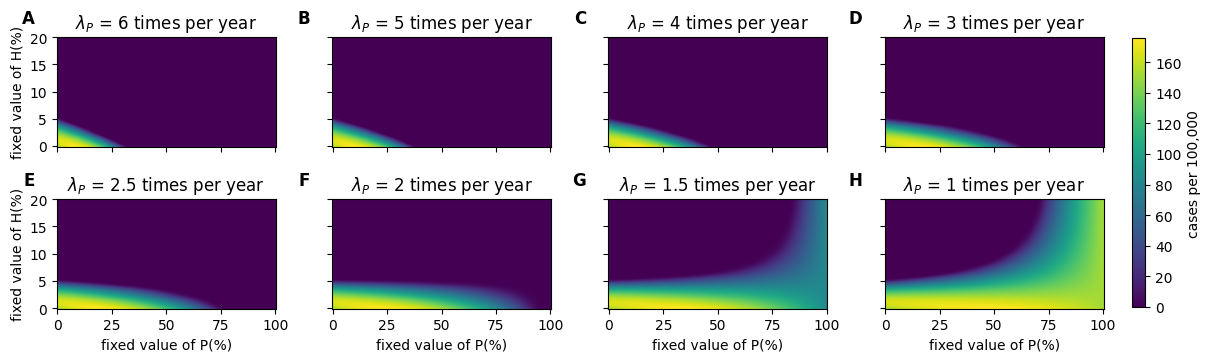

In [6]:
# Plotting


lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]


# Define a formatter function that multiplies the value by 100,000
def formatter(x, pos):
    return f"{x * 1e5:.0f}"


# Determine the global vmin and vmax
all_infections = np.concatenate(
    [
        results[lambda_P]["res_asymp_infections"].flatten()
        for lambda_P in lambda_P_values
    ]
)


global_vmin = np.min(all_infections)


global_vmax = np.max(all_infections)


num_lambda_P = len(lambda_P_values)

gridspec = {
    "wspace": 0,
    "hspace": 0,
    "width_ratios": [1, 1, 1, 1],
    "height_ratios": [1, 1],
}
fig, axes = plt.subplots(
    2,
    num_lambda_P // 2,
    figsize=(3 * num_lambda_P // 2, 3.5),
    constrained_layout=True,
    gridspec_kw=gridspec,
)


nrows, ncols = axes.shape  # Assuming axes is a 2D array of subplots
for idx, lambda_P in enumerate(lambda_P_values):
    ax = axes.flat[idx]
    res_infections = results[lambda_P]["res_asymp_infections"]
    cax = ax.imshow(res_infections, origin="lower", vmin=global_vmin, vmax=global_vmax)
    ax.set_title(f"$\\lambda_P$ = {lambda_P_labels[idx]}")

    # Determine the position of the subplot
    row, col = divmod(idx, ncols)

    # Set xlabels only on the bottom most subplots
    if row == nrows - 1:
        ax.set_xlabel("fixed value of P(%)")
        ax.set_xticks([0, 50, 100, 150, 200])
        ax.set_xticklabels(
            [
                int(Ps[0] * 100),
                int(Ps[50] * 100),
                int(Ps[100] * 100),
                int(Ps[150] * 100),
                int(Ps[200] * 100),
            ]
        )
    else:
        ax.set_xticklabels([])  # Hide xtick labels for non-bottom subplots

    # Set ylabels only on the left most subplots
    if col == 0:
        ax.set_ylabel("fixed value of H(%)")
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels(
            [
                int(Hs[0] * 100),
                int(Hs[25] * 100),
                int(Hs[50] * 100),
                int(Hs[75] * 100),
                int(Hs[100] * 100),
            ]
        )
    else:
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels([])  # Hide ytick labels for non-left subplots

    # Adding subpanel letters, adjust x and y positions as needed
    ax.text(
        -0.1,
        1.25,
        chr(97 + idx),
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Create a single color bar for the whole figure
cbar = fig.colorbar(
    cax,
    ax=axes.ravel().tolist(),
    shrink=0.88,
    format=FuncFormatter(formatter),
    pad=0.015,
)
cbar.ax.set_ylabel("cases per 100,000")
# fig.suptitle(
#     "Endemic new asymptomatic infections (i.e., transitions from S to Ia)"
# )


plt.show()

## Endemic new symptomatic infections (i.e., transitions from S to Is)

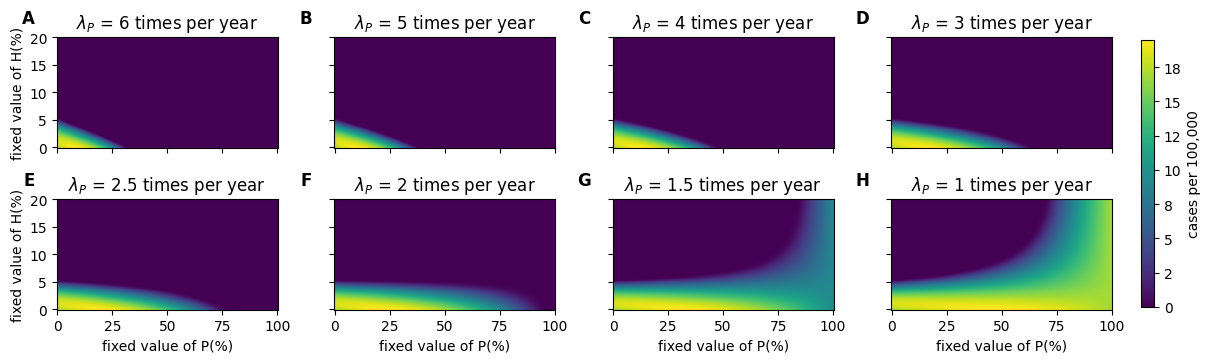

In [7]:
# Plotting


lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]


# Define a formatter function that multiplies the value by 100,000
def formatter(x, pos):
    return f"{x * 1e5:.0f}"


# Determine the global vmin and vmax
all_infections = np.concatenate(
    [results[lambda_P]["res_symp_infections"].flatten() for lambda_P in lambda_P_values]
)


global_vmin = np.min(all_infections)


global_vmax = np.max(all_infections)


num_lambda_P = len(lambda_P_values)

gridspec = {
    "wspace": 0,
    "hspace": 0,
    "width_ratios": [1, 1, 1, 1],
    "height_ratios": [1, 1],
}
fig, axes = plt.subplots(
    2,
    num_lambda_P // 2,
    figsize=(3 * num_lambda_P // 2, 3.5),
    constrained_layout=True,
    gridspec_kw=gridspec,
)


nrows, ncols = axes.shape  # Assuming axes is a 2D array of subplots
for idx, lambda_P in enumerate(lambda_P_values):
    ax = axes.flat[idx]
    res_infections = results[lambda_P]["res_symp_infections"]
    cax = ax.imshow(res_infections, origin="lower", vmin=global_vmin, vmax=global_vmax)
    ax.set_title(f"$\\lambda_P$ = {lambda_P_labels[idx]}")

    # Determine the position of the subplot
    row, col = divmod(idx, ncols)

    # Set xlabels only on the bottom most subplots
    if row == nrows - 1:
        ax.set_xlabel("fixed value of P(%)")
        ax.set_xticks([0, 50, 100, 150, 200])
        ax.set_xticklabels(
            [
                int(Ps[0] * 100),
                int(Ps[50] * 100),
                int(Ps[100] * 100),
                int(Ps[150] * 100),
                int(Ps[200] * 100),
            ]
        )
    else:
        ax.set_xticklabels([])  # Hide xtick labels for non-bottom subplots

    # Set ylabels only on the left most subplots
    if col == 0:
        ax.set_ylabel("fixed value of H(%)")
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels(
            [
                int(Hs[0] * 100),
                int(Hs[25] * 100),
                int(Hs[50] * 100),
                int(Hs[75] * 100),
                int(Hs[100] * 100),
            ]
        )
    else:
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels([])  # Hide ytick labels for non-left subplots

    # Adding subpanel letters, adjust x and y positions as needed
    ax.text(
        -0.1,
        1.25,
        chr(97 + idx),
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Create a single color bar for the whole figure
cbar = fig.colorbar(
    cax,
    ax=axes.ravel().tolist(),
    shrink=0.88,
    format=FuncFormatter(formatter),
    pad=0.015,
)
cbar.ax.set_ylabel("cases per 100,000")
# fig.suptitle(
#     "Endemic new symptomatic infections (i.e., transitions from S to Is)"
# )


plt.show()

## Detected new infections (i.e., transition from Ia to T + Is to T)

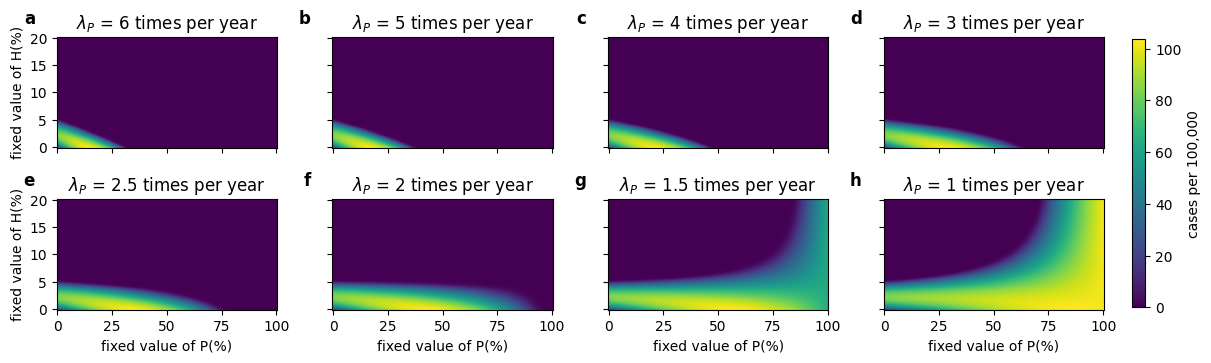

In [11]:
# Plotting


lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]


# Define a formatter function that multiplies the value by 100,000
def formatter(x, pos):
    return f"{x * 1e5:.0f}"


# Determine the global vmin and vmax
all_infections = np.concatenate(
    [results[lambda_P]["res_tests"].flatten() for lambda_P in lambda_P_values]
)


global_vmin = np.min(all_infections)


global_vmax = np.max(all_infections)


num_lambda_P = len(lambda_P_values)

gridspec = {
    "wspace": 0,
    "hspace": 0,
    "width_ratios": [1, 1, 1, 1],
    "height_ratios": [1, 1],
}
fig, axes = plt.subplots(
    2,
    num_lambda_P // 2,
    figsize=(3 * num_lambda_P // 2, 3.5),
    constrained_layout=True,
    gridspec_kw=gridspec,
)


nrows, ncols = axes.shape  # Assuming axes is a 2D array of subplots
for idx, lambda_P in enumerate(lambda_P_values):
    ax = axes.flat[idx]
    res_infections = results[lambda_P]["res_tests"]
    cax = ax.imshow(res_infections, origin="lower", vmin=global_vmin, vmax=global_vmax)
    ax.set_title(f"$\\lambda_P$ = {lambda_P_labels[idx]}")

    # Determine the position of the subplot
    row, col = divmod(idx, ncols)

    # Set xlabels only on the bottom most subplots
    if row == nrows - 1:
        ax.set_xlabel("fixed value of P(%)")
        ax.set_xticks([0, 50, 100, 150, 200])
        ax.set_xticklabels(
            [
                int(Ps[0] * 100),
                int(Ps[50] * 100),
                int(Ps[100] * 100),
                int(Ps[150] * 100),
                int(Ps[200] * 100),
            ]
        )
    else:
        ax.set_xticklabels([])  # Hide xtick labels for non-bottom subplots

    # Set ylabels only on the left most subplots
    if col == 0:
        ax.set_ylabel("fixed value of H(%)")
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels(
            [
                int(Hs[0] * 100),
                int(Hs[25] * 100),
                int(Hs[50] * 100),
                int(Hs[75] * 100),
                int(Hs[100] * 100),
            ]
        )
    else:
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels([])  # Hide ytick labels for non-left subplots

    # Adding subpanel letters, adjust x and y positions as needed
    ax.text(
        -0.1,
        1.25,
        chr(97 + idx),
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Create a single color bar for the whole figure
cbar = fig.colorbar(
    cax,
    ax=axes.ravel().tolist(),
    shrink=0.88,
    format=FuncFormatter(formatter),
    pad=0.015,
)
cbar.ax.set_ylabel("cases per 100,000")


# fig.suptitle("Detected new infections (i.e., transition from Ia to T + Is to T)")


plt.show()

## Detected new asymptomatic infections (i.e., transition from Ia to T)

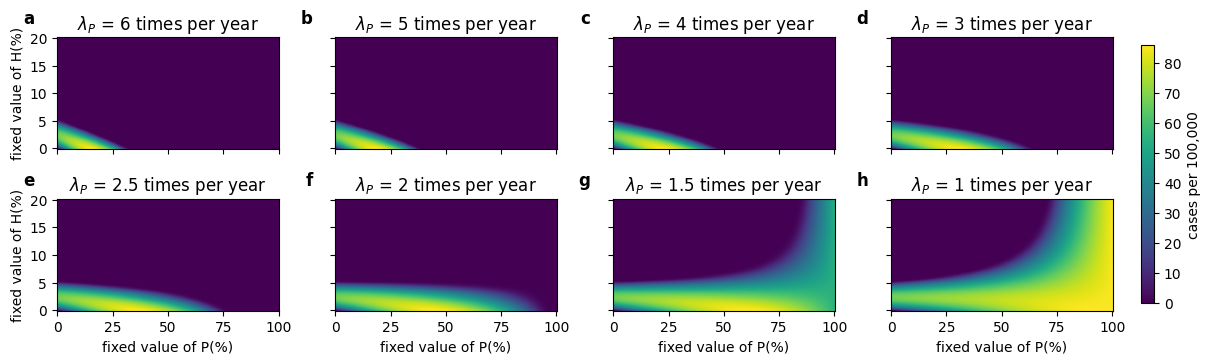

In [10]:
# Plotting


lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]


# Define a formatter function that multiplies the value by 100,000
def formatter(x, pos):
    return f"{x * 1e5:.0f}"


# Determine the global vmin and vmax
all_infections = np.concatenate(
    [results[lambda_P]["res_asymp_tests"].flatten() for lambda_P in lambda_P_values]
)


global_vmin = np.min(all_infections)


global_vmax = np.max(all_infections)


num_lambda_P = len(lambda_P_values)

gridspec = {
    "wspace": 0,
    "hspace": 0,
    "width_ratios": [1, 1, 1, 1],
    "height_ratios": [1, 1],
}
fig, axes = plt.subplots(
    2,
    num_lambda_P // 2,
    figsize=(3 * num_lambda_P // 2, 3.5),
    constrained_layout=True,
    gridspec_kw=gridspec,
)


nrows, ncols = axes.shape  # Assuming axes is a 2D array of subplots
for idx, lambda_P in enumerate(lambda_P_values):
    ax = axes.flat[idx]
    res_infections = results[lambda_P]["res_asymp_tests"]
    cax = ax.imshow(res_infections, origin="lower", vmin=global_vmin, vmax=global_vmax)
    ax.set_title(f"$\\lambda_P$ = {lambda_P_labels[idx]}")

    # Determine the position of the subplot
    row, col = divmod(idx, ncols)

    # Set xlabels only on the bottom most subplots
    if row == nrows - 1:
        ax.set_xlabel("fixed value of P(%)")
        ax.set_xticks([0, 50, 100, 150, 200])
        ax.set_xticklabels(
            [
                int(Ps[0] * 100),
                int(Ps[50] * 100),
                int(Ps[100] * 100),
                int(Ps[150] * 100),
                int(Ps[200] * 100),
            ]
        )
    else:
        ax.set_xticklabels([])  # Hide xtick labels for non-bottom subplots

    # Set ylabels only on the left most subplots
    if col == 0:
        ax.set_ylabel("fixed value of H(%)")
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels(
            [
                int(Hs[0] * 100),
                int(Hs[25] * 100),
                int(Hs[50] * 100),
                int(Hs[75] * 100),
                int(Hs[100] * 100),
            ]
        )
    else:
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels([])  # Hide ytick labels for non-left subplots

    # Adding subpanel letters, adjust x and y positions as needed
    ax.text(
        -0.1,
        1.25,
        chr(97 + idx),
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Create a single color bar for the whole figure
cbar = fig.colorbar(
    cax,
    ax=axes.ravel().tolist(),
    shrink=0.85,
    format=FuncFormatter(formatter),
    pad=0.015,
)
cbar.ax.set_ylabel("cases per 100,000")
# fig.suptitle("Detected new asymptomatic infections (i.e., transition from Ia to T)")

plt.show()

<>:43: SyntaxWarning: invalid escape sequence '\l'
<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:74: SyntaxWarning: invalid escape sequence '\l'
<>:43: SyntaxWarning: invalid escape sequence '\l'
<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:74: SyntaxWarning: invalid escape sequence '\l'
C:\Users\PMallick\AppData\Local\Temp\ipykernel_41436\3177367423.py:43: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda_P$")
C:\Users\PMallick\AppData\Local\Temp\ipykernel_41436\3177367423.py:46: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title("Dependency of Infections on $\lambda_P$, P, and H")
C:\Users\PMallick\AppData\Local\Temp\ipykernel_41436\3177367423.py:71: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda_P$")
C:\Users\PMallick\AppData\Local\Temp\ipykernel_41436\3177367423.py:74: SyntaxWarning: invalid escape sequence '\l'
  

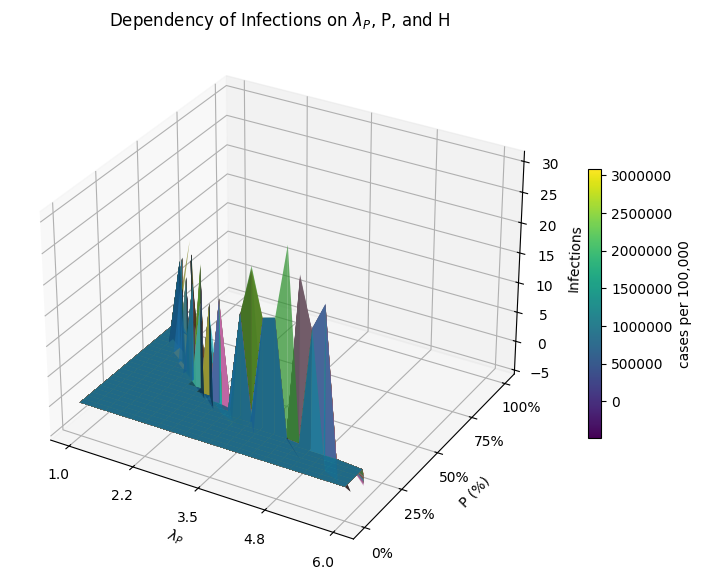

interactive(children=(IntSlider(value=0, description='H Index'), Output()), _dom_classes=('widget-interact',))

In [55]:
# # Define a formatter function that multiplies the value by 100,000
# def formatter(x, pos):
#     return f"{x * 1e5:.0f}"


# # Extract all infection data to determine global vmin and vmax
# all_infections = np.concatenate(
#     [results[lambda_P]["res_asymp_tests"].flatten() for lambda_P in lambda_P_values]
# )

# # global_vmin = np.min(all_infections)
# # global_vmax = np.max(all_infections)

# # Create a 3D plot
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection="3d")

# # Meshgrid for lambda_P, Ps, and Hs values
# Hs = np.linspace(0, 0.2, 101)  # 101 points from 0 to 0.2
# Ps = np.linspace(0, 1.0, 201)  # 201 points from 0 to 1.0
# Lambda_P, P = np.meshgrid(lambda_P_values, Ps)

# # Collect data for each lambda_P, P, and H combination
# Z = np.array(
#     [
#         [results[lambda_P]["res_asymp_tests"][h, p] for lambda_P in lambda_P_values]
#         for p in range(len(Ps))
#         for h in range(len(Hs))
#     ]
# ).reshape(len(Ps), len(Hs), len(lambda_P_values))

# # Plot each surface
# for i, h in enumerate(Hs):
#     ax.plot_surface(Lambda_P, P, Z[:, i, :], label=f"H = {h* 1e5:.0f}%", alpha=0.7)

# # Add color bar
# mappable = plt.cm.ScalarMappable(cmap="viridis")
# mappable.set_array(all_infections)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, format=FuncFormatter(formatter))
# cbar.ax.set_ylabel("cases per 100,000")

# # Set labels and title
# ax.set_xlabel("$\lambda_P$")
# ax.set_ylabel("P (%)")
# ax.set_zlabel("Infections")
# ax.set_title("Dependency of Infections on $\lambda_P$, P, and H")

# # Set x and y ticks for better readability
# ax.set_xticks(lambda_P_values[::5])
# ax.set_xticklabels([f"{x:.1f}" for x in lambda_P_values[::5]])
# ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_yticklabels([f"{x*100:.0f}%" for x in [0, 0.25, 0.5, 0.75, 1]])

# # plt.show()
# # Assuming your existing setup and data preparation code remains the same


# from matplotlib.ticker import FuncFormatter
# import ipywidgets as widgets
# from IPython.display import display


# # Function to update the plot
# def update_plot(h_index=0):
#     fig = plt.figure(figsize=(10, 7))
#     ax = fig.add_subplot(111, projection="3d")

#     # Only plot for a single H value based on the slider
#     ax.plot_surface(Lambda_P, P, Z[:, h_index, :], cmap="viridis", edgecolor="none")

#     ax.set_xlabel("$\lambda_P$")
#     ax.set_ylabel("P (%)")
#     ax.set_zlabel("Infections")
#     ax.set_title("Dependency of Infections on $\lambda_P$, P, and H")

#     ax.set_xticks(lambda_P_values[::5])
#     ax.set_xticklabels([f"{x:.1f}" for x in lambda_P_values[::5]])
#     ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
#     ax.set_yticklabels([f"{x*100:.0f}%" for x in [0, 0.25, 0.5, 0.75, 1]])

#     plt.show()


# # Create a slider widget for H values
# h_slider = widgets.IntSlider(
#     min=0, max=len(Hs) - 1, step=1, value=0, description="H Index"
# )

# # Display the widget and use `interactive_output` to update the plot based on the slider
# widgets.interactive(update_plot, h_index=h_slider)

## Detected new symptomatic infections (i.e., transition from Is to T)

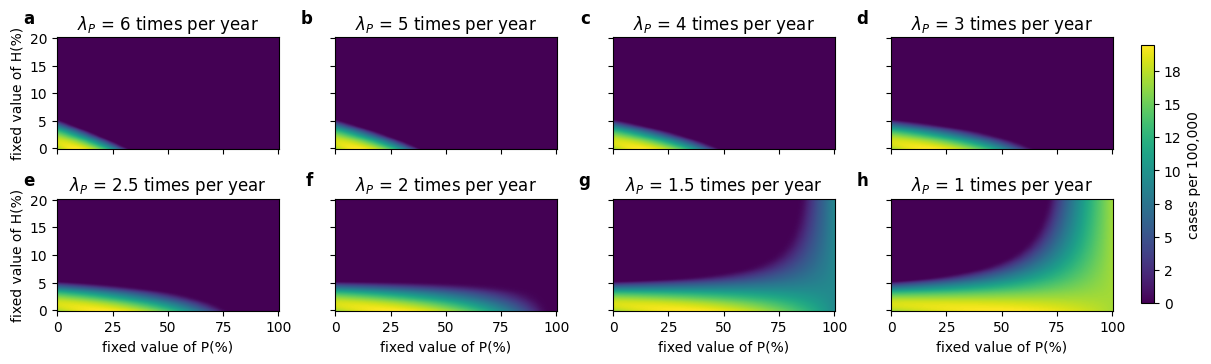

In [12]:
# Plotting


lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]


# Define a formatter function that multiplies the value by 100,000
def formatter(x, pos):
    return f"{x * 1e5:.0f}"


# Determine the global vmin and vmax
all_infections = np.concatenate(
    [results[lambda_P]["res_symp_tests"].flatten() for lambda_P in lambda_P_values]
)


global_vmin = np.min(all_infections)


global_vmax = np.max(all_infections)


num_lambda_P = len(lambda_P_values)

gridspec = {
    "wspace": 0,
    "hspace": 0,
    "width_ratios": [1, 1, 1, 1],
    "height_ratios": [1, 1],
}
fig, axes = plt.subplots(
    2,
    num_lambda_P // 2,
    figsize=(3 * num_lambda_P // 2, 3.5),
    constrained_layout=True,
    gridspec_kw=gridspec,
)


nrows, ncols = axes.shape  # Assuming axes is a 2D array of subplots
for idx, lambda_P in enumerate(lambda_P_values):
    ax = axes.flat[idx]
    res_symp_tests = results[lambda_P]["res_symp_tests"]
    cax = ax.imshow(res_symp_tests, origin="lower")
    ax.set_title(f"$\\lambda_P$ = {lambda_P_labels[idx]}")

    # Determine the position of the subplot
    row, col = divmod(idx, ncols)

    # Set xlabels only on the bottom most subplots
    if row == nrows - 1:
        ax.set_xlabel("fixed value of P(%)")
        ax.set_xticks([0, 50, 100, 150, 200])
        ax.set_xticklabels(
            [
                int(Ps[0] * 100),
                int(Ps[50] * 100),
                int(Ps[100] * 100),
                int(Ps[150] * 100),
                int(Ps[200] * 100),
            ]
        )
    else:
        ax.set_xticklabels([])  # Hide xtick labels for non-bottom subplots

    # Set ylabels only on the left most subplots
    if col == 0:
        ax.set_ylabel("fixed value of H(%)")
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels(
            [
                int(Hs[0] * 100),
                int(Hs[25] * 100),
                int(Hs[50] * 100),
                int(Hs[75] * 100),
                int(Hs[100] * 100),
            ]
        )
    else:
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels([])  # Hide ytick labels for non-left subplots

    # Adding subpanel letters, adjust x and y positions as needed
    ax.text(
        -0.1,
        1.25,
        chr(97 + idx),
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Create a single color bar for the whole figure
cbar = fig.colorbar(
    cax,
    ax=axes.ravel().tolist(),
    shrink=0.85,
    format=FuncFormatter(formatter),
    pad=0.015,
)
cbar.ax.set_ylabel("cases per 100,000")
# fig.suptitle(
#     "Detected new symptomatic infections (i.e., transition from Is to T)"
# )


plt.show()

## Lambda STI

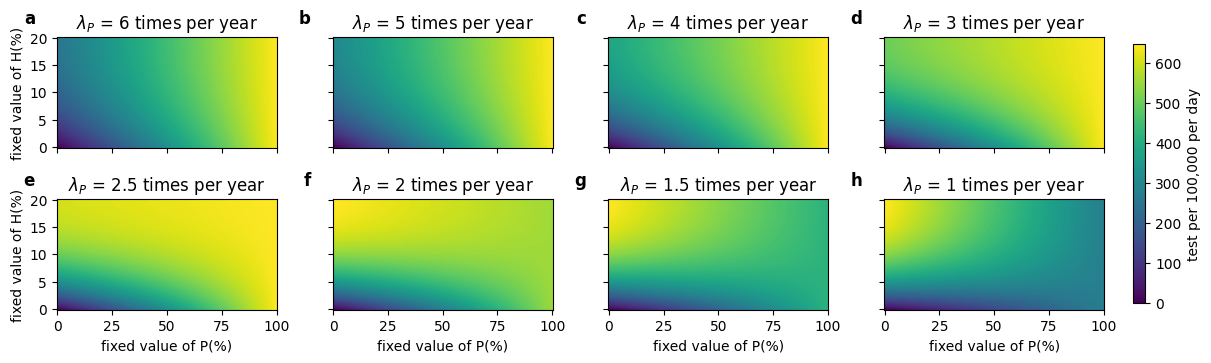

In [20]:
# Define m function
# def compute_m(args, H):
#     return args["m_max"] - args["m_max"] / args["H_thres"] * args["m_eps"] * np.log(
#         1 + np.exp((args["H_thres"] - H) / args["m_eps"])
#     )


def compute_m(args, H):
    """
    Exponential function with three parameters: minimum value, maximum value, and rate/tau.

    Args:
    args (dict): A dictionary containing the parameters 'H', 'min_exp', 'max_exp', and 'tau_exp'.

    Returns:
    float: The output of the exponential function.
    """
    H = H
    min_exp = args["min_exp"]
    max_exp = args["max_exp"]
    tau_exp = args["tau_exp"]

    return min_exp + (max_exp - min_exp) * (1 - np.exp(-H / tau_exp))


# Plotting
lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]

Hs = np.linspace(0, 0.2, 101)  # 101 points from 0 to 0.2
Ps = np.linspace(0, 1.0, 201)  # 201 points from 0 to 1.0


# Define a formatter function that multiplies the value by 100,000
def formatter(x, pos):
    return f"{x * 1e5:.0f}"


gridspec = {
    "wspace": 0,
    "hspace": 0,
    "width_ratios": [1, 1, 1, 1],
    "height_ratios": [1, 1],
}
fig, axes = plt.subplots(
    2,
    num_lambda_P // 2,
    figsize=(3 * num_lambda_P // 2, 3.5),
    constrained_layout=True,
    gridspec_kw=gridspec,
)

num_lambda_P = len(lambda_P_values)
lambda_H = np.zeros([len(Hs), len(Ps)])
lambda_P = np.zeros([len(Hs), len(Ps)])

nrows, ncols = axes.shape  # Assuming axes is a 2D array of subplots
for idx, lambda_P_val in enumerate(lambda_P_values):

    for i, H in enumerate(Hs):
        for j, P in enumerate(Ps):
            m = compute_m(args, H)
            lambda_H[i, j] = args["c"] * (1 - m) * args["beta_HIV"] * H * (1 - P)
            lambda_P[i, j] = lambda_P_val * P

    ax = axes.flat[idx]
    total_lambda = lambda_P + lambda_H
    cax = ax.imshow(total_lambda, origin="lower")
    ax.set_title(f"$\\lambda_P$ = {lambda_P_labels[idx]}")

    # Determine the position of the subplot
    row, col = divmod(idx, ncols)

    # Set xlabels only on the bottom most subplots
    if row == nrows - 1:
        ax.set_xlabel("fixed value of P(%)")
        ax.set_xticks([0, 50, 100, 150, 200])
        ax.set_xticklabels(
            [
                int(Ps[0] * 100),
                int(Ps[50] * 100),
                int(Ps[100] * 100),
                int(Ps[150] * 100),
                int(Ps[200] * 100),
            ]
        )
    else:
        ax.set_xticklabels([])  # Hide xtick labels for non-bottom subplots

    # Set ylabels only on the left most subplots
    if col == 0:
        ax.set_ylabel("fixed value of H(%)")
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels(
            [
                int(Hs[0] * 100),
                int(Hs[25] * 100),
                int(Hs[50] * 100),
                int(Hs[75] * 100),
                int(Hs[100] * 100),
            ]
        )
    else:
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels([])  # Hide ytick labels for non-left subplots

    # Adding subpanel letters, adjust x and y positions as needed
    ax.text(
        -0.1,
        1.25,
        chr(97 + idx),
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Create a single color bar for the whole figure
cbar = fig.colorbar(
    cax,
    ax=axes.ravel().tolist(),
    shrink=0.85,
    format=FuncFormatter(formatter),
    pad=0.015,
)
cbar.ax.set_ylabel("test per 100,000 per day")

# fig.suptitle(
#     "$\lambda_{STI}$ = $\lambda_H \cdot (1-P) $ + $\lambda_P \cdot P$",
#     fontweight="bold",
# )

plt.show()

## Lambda H

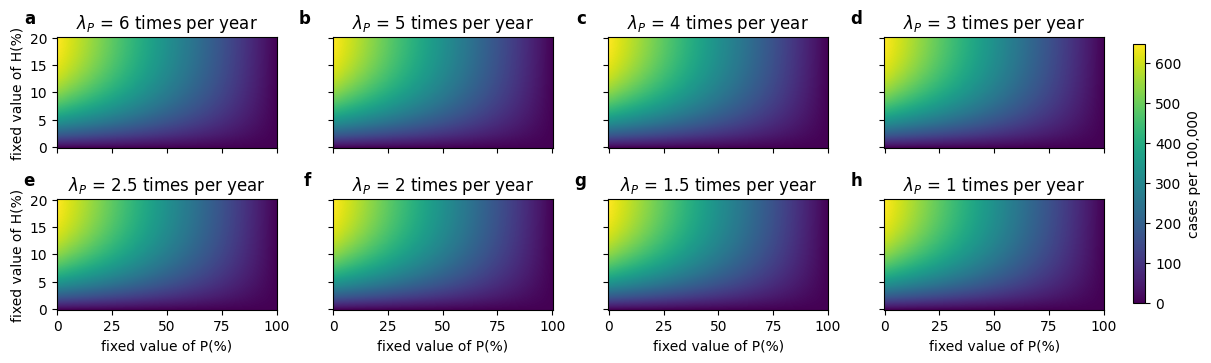

In [15]:
# Define m function
# def compute_m(args, H):
#     return args["m_max"] - args["m_max"] / args["H_thres"] * args["m_eps"] * np.log(
#         1 + np.exp((args["H_thres"] - H) / args["m_eps"])
#     )


def compute_m(args, H):
    """
    Exponential function with three parameters: minimum value, maximum value, and rate/tau.

    Args:
    args (dict): A dictionary containing the parameters 'H', 'min_exp', 'max_exp', and 'tau_exp'.

    Returns:
    float: The output of the exponential function.
    """
    H = H
    min_exp = args["min_exp"]
    max_exp = args["max_exp"]
    tau_exp = args["tau_exp"]

    return min_exp + (max_exp - min_exp) * (1 - np.exp(-H / tau_exp))


# Plotting
lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]

Hs = np.linspace(0, 0.2, 101)  # 101 points from 0 to 0.2
Ps = np.linspace(0, 1.0, 201)  # 201 points from 0 to 1.0


# Define a formatter function that multiplies the value by 100,000
def formatter(x, pos):
    return f"{x * 1e5:.0f}"


gridspec = {
    "wspace": 0,
    "hspace": 0,
    "width_ratios": [1, 1, 1, 1],
    "height_ratios": [1, 1],
}
fig, axes = plt.subplots(
    2,
    num_lambda_P // 2,
    figsize=(3 * num_lambda_P // 2, 3.5),
    constrained_layout=True,
    gridspec_kw=gridspec,
)

num_lambda_P = len(lambda_P_values)
lambda_H = np.zeros([len(Hs), len(Ps)])
lambda_P = np.zeros([len(Hs), len(Ps)])

# Store m values for each H
m_values = np.zeros(len(Hs))

nrows, ncols = axes.shape  # Assuming axes is a 2D array of subplots
for idx, lambda_P_val in enumerate(lambda_P_values):

    for i, H in enumerate(Hs):
        for j, P in enumerate(Ps):
            m = compute_m(args, H)
            m_values[i] = m
            lambda_H[i, j] = args["c"] * (1 - m) * args["beta_HIV"] * H * (1 - P)

    ax = axes.flat[idx]
    cax = ax.imshow(lambda_H, origin="lower")
    ax.set_title(f"$\\lambda_P$ = {lambda_P_labels[idx]}")

    # Determine the position of the subplot
    row, col = divmod(idx, ncols)

    # Set xlabels only on the bottom most subplots
    if row == nrows - 1:
        ax.set_xlabel("fixed value of P(%)")
        ax.set_xticks([0, 50, 100, 150, 200])
        ax.set_xticklabels(
            [
                int(Ps[0] * 100),
                int(Ps[50] * 100),
                int(Ps[100] * 100),
                int(Ps[150] * 100),
                int(Ps[200] * 100),
            ]
        )
    else:
        ax.set_xticklabels([])  # Hide xtick labels for non-bottom subplots

    # Set ylabels only on the left most subplots
    if col == 0:
        ax.set_ylabel("fixed value of H(%)")
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels(
            [
                int(Hs[0] * 100),
                int(Hs[25] * 100),
                int(Hs[50] * 100),
                int(Hs[75] * 100),
                int(Hs[100] * 100),
            ]
        )
    else:
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels([])  # Hide ytick labels for non-left subplots

    # Adding subpanel letters, adjust x and y positions as needed
    ax.text(
        -0.1,
        1.25,
        chr(97 + idx),
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Create a single color bar for the whole figure
cbar = fig.colorbar(
    cax,
    ax=axes.ravel().tolist(),
    shrink=0.85,
    format=FuncFormatter(formatter),
    pad=0.015,
)
cbar.ax.set_ylabel("cases per 100,000")

# fig.suptitle(
#     "$\lambda_H \cdot (1-P) $",
#     fontweight="bold",
# )

plt.show()

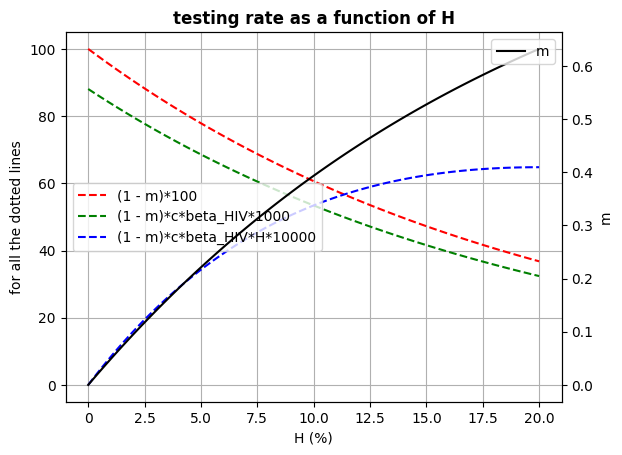

In [16]:
# Plot m values as a function of H
fig, ax = plt.subplots(1, 1)

axR = ax.twinx()
axR.plot(Hs, m_values, color="black", label="m")
ax.plot(
    Hs,
    ((1 - m_values) * 100),
    color="red",
    linestyle="--",
    label="(1 - m)*100",
)
ax.plot(
    Hs,
    (args["c"] * (1 - m_values) * args["beta_HIV"] * 1000),
    color="green",
    linestyle="--",
    label="(1 - m)*c*beta_HIV*1000",
)
ax.plot(
    Hs,
    (args["c"] * (1 - m_values) * args["beta_HIV"] * Hs * 10000),
    color="blue",
    linestyle="--",
    label="(1 - m)*c*beta_HIV*H*10000",
)
ax.set_xlabel("H (%)")
axR.set_ylabel("m")
ax.set_ylabel("for all the dotted lines")
ax.set_title("testing rate as a function of H", fontweight="bold")
ax.set_xticks([0, 0.025, 0.050, 0.075, 0.100, 0.125, 0.150, 0.175, 0.200])
ax.set_xticklabels(
    [
        "0",
        "2.5",
        "5.0",
        "7.5",
        "10.0",
        "12.5",
        "15.0",
        "17.5",
        "20.0",
    ]
)
ax.grid(True)
axR.legend(loc="upper right")
ax.legend(loc="center left")

## Lambda P

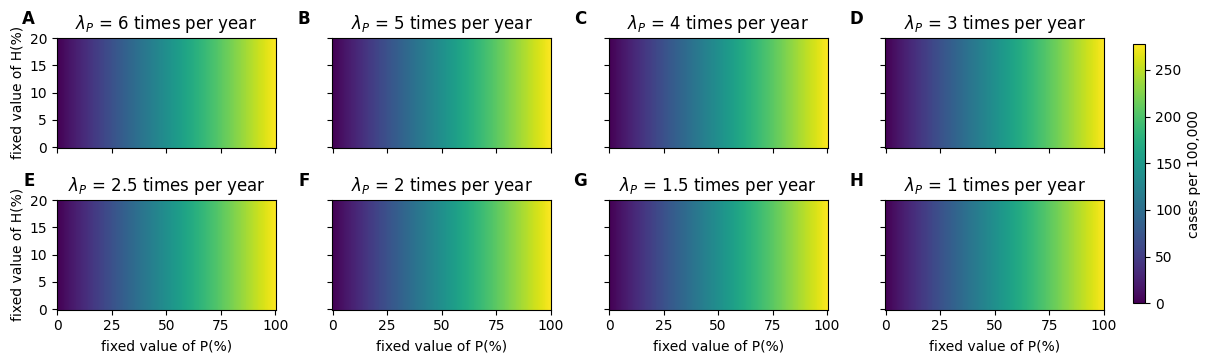

In [18]:
# Define m function
# def compute_m(args, H):
#     return args["m_max"] - args["m_max"] / args["H_thres"] * args["m_eps"] * np.log(
#         1 + np.exp((args["H_thres"] - H) / args["m_eps"])
#     )
def compute_m(args, H):
    """
    Exponential function with three parameters: minimum value, maximum value, and rate/tau.

    Args:
    args (dict): A dictionary containing the parameters 'H', 'min_exp', 'max_exp', and 'tau_exp'.

    Returns:
    float: The output of the exponential function.
    """
    H = H
    min_exp = args["min_exp"]
    max_exp = args["max_exp"]
    tau_exp = args["tau_exp"]

    return min_exp + (max_exp - min_exp) * (1 - np.exp(-H / tau_exp))


# Plotting
lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]

Hs = np.linspace(0, 0.2, 101)  # 101 points from 0 to 0.2
Ps = np.linspace(0, 1.0, 201)  # 201 points from 0 to 1.0


# Define a formatter function that multiplies the value by 100,000
def formatter(x, pos):
    return f"{x * 1e5:.0f}"


gridspec = {
    "wspace": 0,
    "hspace": 0,
    "width_ratios": [1, 1, 1, 1],
    "height_ratios": [1, 1],
}
fig, axes = plt.subplots(
    2,
    num_lambda_P // 2,
    figsize=(3 * num_lambda_P // 2, 3.5),
    constrained_layout=True,
    gridspec_kw=gridspec,
)

num_lambda_P = len(lambda_P_values)
lambda_H = np.zeros([len(Hs), len(Ps)])
lambda_P = np.zeros([len(Hs), len(Ps)])

nrows, ncols = axes.shape  # Assuming axes is a 2D array of subplots
for idx, lambda_P_val in enumerate(lambda_P_values):

    for i, H in enumerate(Hs):
        for j, P in enumerate(Ps):
            lambda_P[i, j] = lambda_P_val * P

    ax = axes.flat[idx]
    cax = ax.imshow(lambda_P, origin="lower")
    ax.set_title(f"$\\lambda_P$ = {lambda_P_labels[idx]}")

    # Determine the position of the subplot
    row, col = divmod(idx, ncols)

    # Set xlabels only on the bottom most subplots
    if row == nrows - 1:
        ax.set_xlabel("fixed value of P(%)")
        ax.set_xticks([0, 50, 100, 150, 200])
        ax.set_xticklabels(
            [
                int(Ps[0] * 100),
                int(Ps[50] * 100),
                int(Ps[100] * 100),
                int(Ps[150] * 100),
                int(Ps[200] * 100),
            ]
        )
    else:
        ax.set_xticklabels([])  # Hide xtick labels for non-bottom subplots

    # Set ylabels only on the left most subplots
    if col == 0:
        ax.set_ylabel("fixed value of H(%)")
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels(
            [
                int(Hs[0] * 100),
                int(Hs[25] * 100),
                int(Hs[50] * 100),
                int(Hs[75] * 100),
                int(Hs[100] * 100),
            ]
        )
    else:
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels([])  # Hide ytick labels for non-left subplots

    # Adding subpanel letters, adjust x and y positions as needed
    ax.text(
        -0.1,
        1.25,
        chr(65 + idx),
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Create a single color bar for the whole figure
cbar = fig.colorbar(
    cax,
    ax=axes.ravel().tolist(),
    shrink=0.85,
    format=FuncFormatter(formatter),
    pad=0.015,
)
cbar.ax.set_ylabel("cases per 100,000")

# fig.suptitle(
#     "$\lambda_{STI}$ = $\lambda_H \cdot (1-P) $ + $\lambda_P \cdot P$",
#     fontweight="bold",
# )

plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
C:\Users\PMallick\AppData\Local\Temp\ipykernel_42928\3164157755.py:26: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f"$\lambda_P$ = {lambda_P_labels[idx]}")


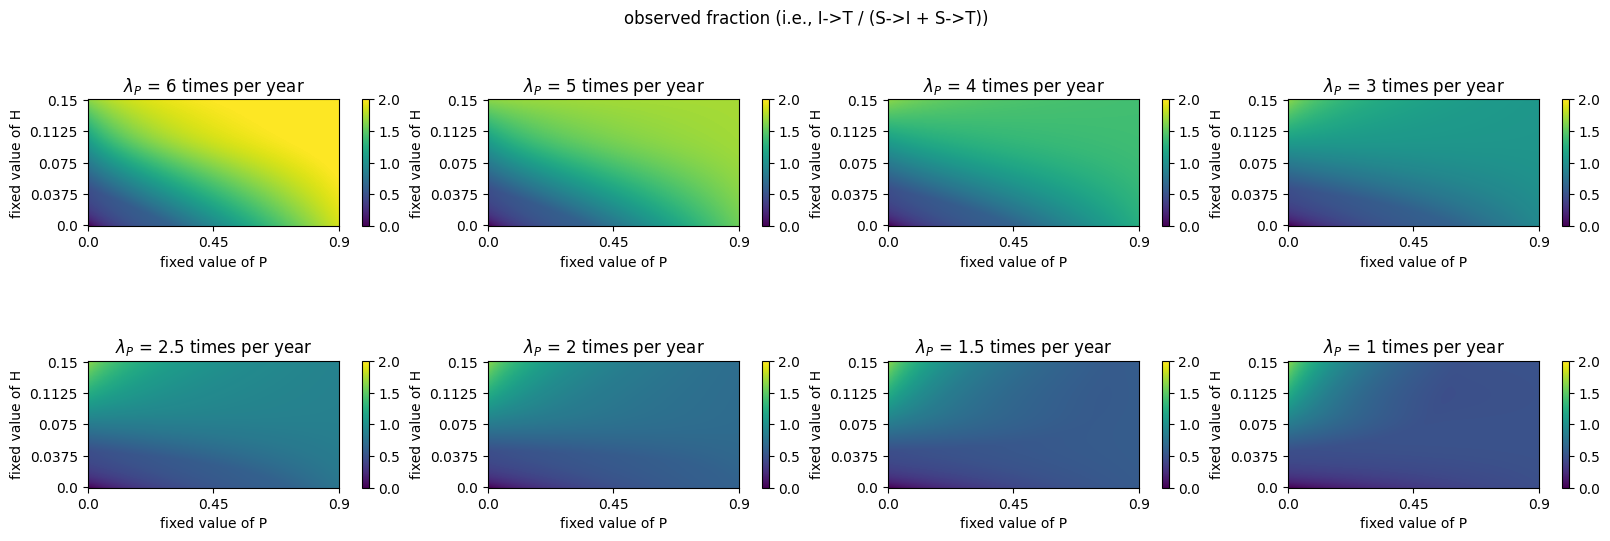

In [7]:
Hs = np.linspace(0, 0.15, 101)
Ps = np.linspace(0, 0.9, 201)
# Plotting
lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]

num_lambda_P = len(lambda_P_values)
fig, axes = plt.subplots(
    2, num_lambda_P // 2, figsize=(4 * num_lambda_P // 2, 5.5), constrained_layout=True
)


for idx, lambda_P in enumerate(lambda_P_values):
    ax = axes.flat[idx]
    res_infections = results[lambda_P]["res_infections"]
    res_tests = results[lambda_P]["res_tests"]
    cax = ax.imshow(res_tests / res_infections, origin="lower", vmin=0, vmax=2)
    ax.set_title(f"$\lambda_P$ = {lambda_P_labels[idx]}")
    ax.set_xlabel("fixed value of P")
    ax.set_ylabel("fixed value of H")
    ax.set_xticks([0, 100, 200])
    ax.set_xticklabels([Ps[0], 0.45, Ps[200]])
    ax.set_yticks([0, 25, 50, 75, 100])
    ax.set_yticklabels([Hs[0], Hs[25], Hs[50], Hs[75], Hs[100]])
    fig.colorbar(cax, ax=ax, shrink=0.5)
fig.suptitle("observed fraction (i.e., I->T / (S->I + S->T))")

plt.show()

In [ ]:
Hs = np.linspace(0, 0.2, 101)
Ps = np.linspace(0, 0.9, 201)
# Plotting
lambda_P_labels = [
    "6 times per year",
    "5 times per year",
    "4 times per year",
    "3 times per year",
    "2.5 times per year",
    "2 times per year",
    "1.5 times per year",
    "1 times per year",
]
num_lambda_P = len(lambda_P_values)
fig, axes = plt.subplots(
    2, num_lambda_P // 2, figsize=(4 * num_lambda_P // 2, 4.5), constrained_layout=True
)


for idx, lambda_P in enumerate(lambda_P_values):
    ax = axes.flat[idx]
    res_I = results[lambda_P]["res_I"]
    res_T = results[lambda_P]["res_T"]
    cax = ax.imshow(res_I - res_T, origin="lower", vmin=0, vmax=0.7)
    ax.set_title(f"$\lambda_P$ = {lambda_P_labels[idx]}")
    ax.set_xlabel("fixed value of P")
    ax.set_ylabel("fixed value of H")
    ax.set_xticks([0, 100, 200])
    ax.set_xticklabels([Ps[0], 0.45, Ps[200]])
    ax.set_yticks([0, 25, 50, 75, 100])
    ax.set_yticklabels([Hs[0], Hs[25], Hs[50], Hs[75], Hs[100]])
    fig.colorbar(cax, ax=ax, shrink=0.5)
fig.suptitle("observed fraction T/(T+I)")

plt.show()